## Importing Required Libraries

This cell imports essential libraries for data analysis, visualization, and custom modules for preprocessing, sentiment analysis, and thematic analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing necessary modules
import sys
sys.path.insert(1, '../scripts')
from preprocessors import Preprocessor
from sentiment_analyzer import SentimentAnalyzer as SA
from thematic_analyzer import ThematicAnalyzer as TA

/home/est-lul/Documents/Projects/customer-experience-analytics/.venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting Up Progress Bars

This cell sets up the tqdm progress bar for pandas operations to monitor the progress of long-running tasks.

In [2]:
from tqdm import tqdm
tqdm.pandas()

## Loading the Dataset

This cell loads the customer reviews dataset for the Commercial Bank of Ethiopia from a CSV file.

In [3]:
try:
    # Load the dataset
    df = pd.read_csv('../../data/Commercial_Bank_of_Ethiopia_reviews.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred: {e}")
    exit(1)

In [4]:
df.shape
df.head()

,review_text,rating,date,bank_name,source,user_name
0,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,kibru tebeka
1,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play,Abreham Shiferaw
2,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play,Ibrahim Sultan
3,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,oliyad werku
4,bezabih,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Aschalew Fereja


# Initializing the Preprocessor

This cell initializes the text preprocessor, which will be used for language detection and text cleaning.

In [5]:
# Initialize the preprocessor
preprocessor = Preprocessor()

[nltk_data] Downloading package punkt to /home/est-lul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/est-lul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Detecting Language of Reviews

This cell detects the language of each review using the preprocessor and adds the result as a new column.

In [6]:
# Detecting language of the reviews
df['language'] = df['review_text'].progress_apply(preprocessor.detect_language)
df.head()

100%|██████████| 500/500 [10:55<00:00,  1.31s/it]


,review_text,rating,date,bank_name,source,user_name,language
0,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,kibru tebeka,en
1,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play,Abreham Shiferaw,en
2,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play,Ibrahim Sultan,UNKNOWN
3,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,oliyad werku,af
4,bezabih,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Aschalew Fereja,sl


## Filtering Out Unknown Languages

This cell removes reviews where the language could not be detected.

In [7]:
# Filter out rows where language detection failed
df = df[df['language'] != 'UNKNOWN'].copy()
print(df.shape)

(475, 7)


## Plotting Rating Distribution

This cell visualizes the distribution of ratings in the dataset using a bar chart.

<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

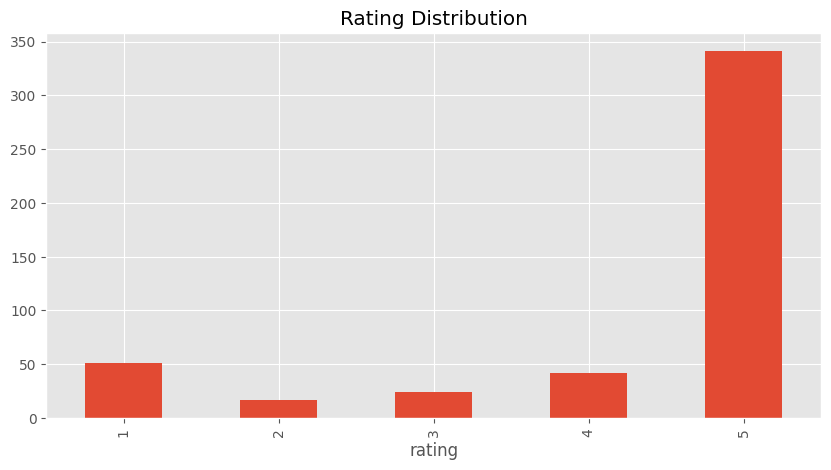

In [8]:
# Plotting the distribution of ratings
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', figsize=(10, 5))

## Preprocessing Review Text

This cell applies text preprocessing (such as cleaning and normalization) to each review.

In [9]:
# Apply preprocessing to the review text
df['processed_text'] = df['review_text'].progress_apply(preprocessor.preprocess_text)

100%|██████████| 475/475 [00:02<00:00, 169.45it/s]


## Initializing Sentiment Analyzer

This cell initializes the sentiment analyzer for further sentiment analysis tasks.

In [12]:
# Initialize the sentiment analyzer
sa = SA()

## Applying TextBlob Sentiment Analysis

This cell applies TextBlob sentiment analysis to the processed reviews and displays the sentiment distribution.

In [13]:
# Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['processed_text'].progress_apply(sa.get_textblob_sentiment)

# Display sentiment distribution
print(df['textblob_sentiment'].value_counts())

100%|██████████| 475/475 [00:00<00:00, 6845.43it/s]

textblob_sentiment
positive    336
neutral     113
negative     26
Name: count, dtype: int64


## Applying VADER Sentiment Analysis

This cell applies VADER sentiment analysis to the reviews and displays the sentiment distribution.

In [14]:
# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].progress_apply(sa.get_vader_sentiment)

# Display VADER sentiment distribution
print(df['vader_sentiment'].value_counts())

100%|██████████| 475/475 [00:01<00:00, 252.89it/s]

vader_sentiment
positive    338
neutral     104
negative     33
Name: count, dtype: int64


## Applying DistilBERT Sentiment Analysis

This cell applies DistilBERT sentiment analysis to the reviews and displays the sentiment distribution.

In [15]:
# Apply DistilBERT sentiment analysis
df['distilbert_sentiment'] = df['review_text'].progress_apply(sa.get_distilbert_sentiment)

# Display DistilBERT sentiment distribution
print(df['distilbert_sentiment'].value_counts())

100%|██████████| 475/475 [00:10<00:00, 44.08it/s]

distilbert_sentiment
POSITIVE    345
NEGATIVE    130
Name: count, dtype: int64


In [16]:
df.sample(10)

,review_text,rating,date,bank_name,source,user_name,language,processed_text,textblob_sentiment,vader_sentiment,distilbert_sentiment
347,"very good, but sometimes NUR CBE comes without...",4,2025-04-01,Commercial Bank of Ethiopia,Google Play,Ibrahim Dinku,en,good sometimes nur cbe come without consent ev...,positive,neutral,NEGATIVE
237,always CBE is the leading Commercial Bank💪💪💪,5,2025-04-18,Commercial Bank of Ethiopia,Google Play,Abrsh Baba,en,always cbe leading commercial,neutral,neutral,POSITIVE
33,yes good,5,2025-05-28,Commercial Bank of Ethiopia,Google Play,Haider Sadik,so,yes good,positive,positive,POSITIVE
458,good,5,2025-03-28,Commercial Bank of Ethiopia,Google Play,AYISA Yakob,so,good,positive,positive,POSITIVE
37,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play,Umi Abi,af,network,neutral,neutral,NEGATIVE
225,use ful,5,2025-04-21,Commercial Bank of Ethiopia,Google Play,Daniel Dani,es,use ful,neutral,neutral,NEGATIVE
196,it's the best app i,5,2025-05-02,Commercial Bank of Ethiopia,Google Play,Beza Sibhatu,en,best app,positive,positive,POSITIVE
306,the best one,5,2025-04-06,Commercial Bank of Ethiopia,Google Play,Gesese Geze,en,best one,positive,positive,POSITIVE
291,work on screen shot system,4,2025-04-08,Commercial Bank of Ethiopia,Google Play,Johny Gech,en,work screen shot system,neutral,neutral,NEGATIVE
244,perfectly special,5,2025-04-18,Commercial Bank of Ethiopia,Google Play,Abel Leul,en,perfectly special,positive,positive,POSITIVE


## Sentiment Count per Rating

This cell creates a barplot showing the count of each sentiment (positive, negative, etc.) per rating.

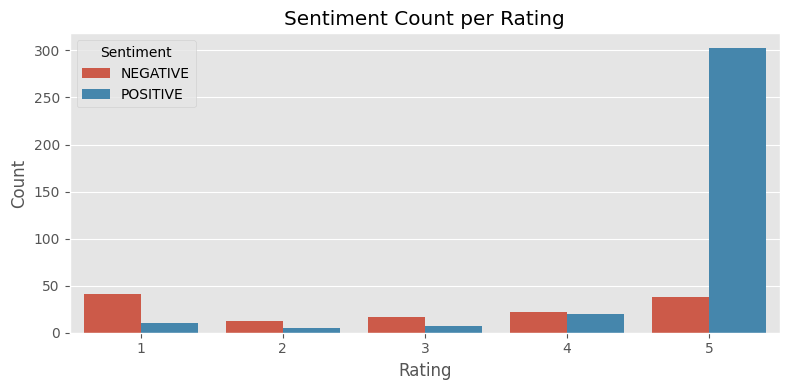

In [17]:
# Plotting the sentiment distribution for distilBERT
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', hue='distilbert_sentiment')
plt.title('Sentiment Count per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Initializing Thematic Analyzer and Extracting Keywords

This cell initializes the thematic analyzer and extracts the top keywords from the processed reviews.

In [18]:
# Initialize the thematic analyzer
ta = TA()
# Get top keywords
keywords = ta.get_keywords(df['processed_text'])
print("Top keywords:", keywords)

Top keywords: ['2025' 'access' 'account' 'add' 'allow' 'amazing' 'app' 'app ever'
 'application' 'apps' 'back' 'bad' 'bank' 'banking' 'banking app' 'best'
 'best app' 'better' 'ca' 'cbe' 'cbe app' 'convenient' 'could' 'crash'
 'day' 'developer' 'developer option' 'doesnt' 'easy' 'easy use' 'even'
 'ever' 'every' 'excellent' 'experience' 'fantastic' 'fast' 'feature'
 'fix' 'good' 'good app' 'good application' 'great' 'great app' 'issue'
 'keep' 'life' 'like' 'love' 'make' 'many' 'mobile' 'mobile banking'
 'money' 'much' 'need' 'network' 'nice' 'nice app' 'ok' 'old' 'one'
 'option' 'please' 'problem' 'really' 'reason' 'reliable' 'say' 'screen'
 'screen shot' 'screenshot' 'screenshots' 'security' 'seen' 'send'
 'service' 'shot' 'simple' 'sometimes' 'system' 'take' 'thank' 'thing'
 'time' 'transaction' 'transfer' 'try' 'update' 'use' 'used' 'useful'
 'user' 'using' 'week' 'well' 'without' 'work' 'working' 'wow']


## Extracting Top N-Gram Keywords

This cell extracts and displays the top bi-gram and tri-gram keywords from the processed reviews.

In [19]:
# Get top N-gram keywords
bi_grams = ta.get_keywords(df['processed_text'], top_n=20, ngram_range=(2, 3))
print("Top N-Gram Keywords: ", bi_grams)

Top N-Gram Keywords:  ['app ever' 'bank statement' 'banking app' 'best app' 'bring back'
 'cbe app' 'developer option' 'easy use' 'ever seen' 'get money'
 'good app' 'good application' 'good job' 'great app' 'mobile banking'
 'mobile banking app' 'nice app' 'please fix' 'screen shot' 'useful app']


## Extracting Keywords from Positive and Negative Reviews

This cell extracts and displays the top keywords found in positive and negative reviews separately.

In [20]:
positive_reviews = df[df['distilbert_sentiment'] == 'POSITIVE']['processed_text']
negative_reviews = df[df['distilbert_sentiment'] == 'NEGATIVE']['processed_text']

positive_keywords = ta.get_keywords(positive_reviews, top_n=10)
print("Top keywords in positive reviews:", positive_keywords)

negative_keywords = ta.get_keywords(negative_reviews, top_n=10)
print("Top keywords in negative reviews:", negative_keywords)

Top keywords in positive reviews: ['app' 'best' 'best app' 'cbe' 'easy' 'good' 'good app' 'great' 'like'
 'nice']
Top keywords in negative reviews: ['app' 'bank' 'banking' 'ca' 'cbe' 'good' 'make' 'mobile' 'need'
 'screenshot']


## Word Cloud for Positive Reviews

This cell generates and displays a word cloud for positive reviews.

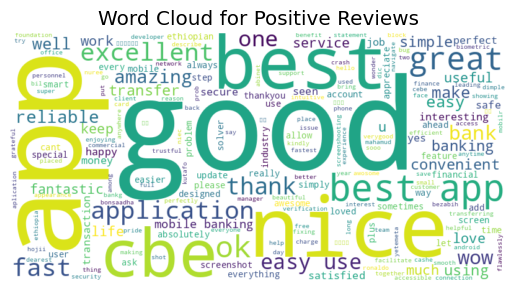

In [21]:
from wordcloud import WordCloud
# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()



# Word Cloud for Negative Reviews

This cell generates and displays a word cloud for negative reviews.

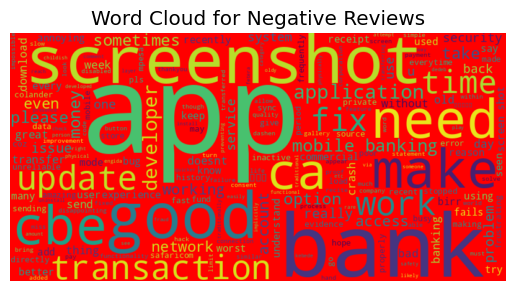

In [22]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## Assigning Themes to Reviews

This cell assigns thematic labels to each review and displays the results.

In [23]:
# Assigning themes to the reviews
df["themes"] = df["processed_text"].progress_apply(ta.assign_theme)
print(df[["review_text", "themes"]])

100%|██████████| 475/475 [00:00<00:00, 328436.27it/s]

                                           review_text            themes
0                                       not functional           [Other]
1    everytime you uninstall the app you have to re...  [User Interface]
3                                                 best           [Other]
4                                              bezabih           [Other]
5                         Best Mobile Banking app ever           [Other]
..                                                 ...               ...
495  it's a very good application but sometimes it ...           [Other]
496                                 commercial dank...           [Other]
497                                              great           [Other]
498                                     it's very good           [Other]
499                                   to getting money           [Other]

[475 rows x 2 columns]


## Saving the final dataframe

This cell saves the processed dataframe, which now includes sentiment and thematic analysis results, to a CSV file for future use or further analysis.

In [24]:
try:
    df.to_csv('../../data/cbe_reviews_with_sentiment_and_themes.csv', index=False)
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")
    exit(1)